In [1]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [2]:
x, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
#y is created but is the output feature and thus not used

In [3]:
x

array([[ 0.90966289, -0.503497  ],
       [-0.63942279, -0.49684518],
       [-0.15195558,  1.0113803 ],
       ...,
       [ 0.27965558, -0.1690807 ],
       [-0.71048659,  0.62550547],
       [-0.38616831,  0.08390161]])

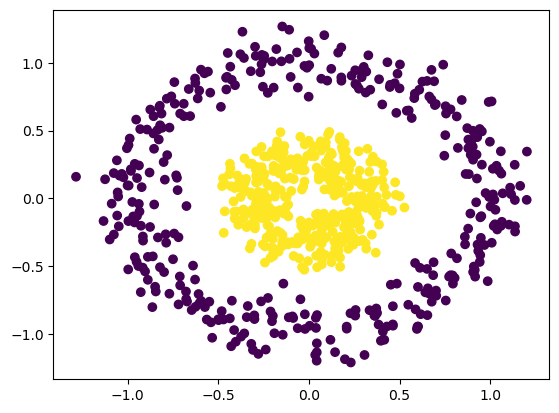

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)
#using y gives two groups and not clusters/outliers

In [10]:
lof = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2,
                        metric_params=None, contamination='auto', novelty=False, n_jobs=None)

In [16]:
pred = lof.fit_predict(x)
pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [17]:
lof_scores = -lof.negative_outlier_factor_
lof_scores

array([0.98876738, 1.05961603, 0.97504377, 1.05832758, 0.98507482,
       1.00992798, 0.97207927, 1.22369611, 0.98861831, 0.99741345,
       0.99469619, 0.97629613, 0.96895373, 1.00216687, 1.05175653,
       1.1113229 , 1.12784223, 1.05330328, 1.07952413, 1.03085895,
       0.99881694, 1.06779723, 0.97175   , 0.99452577, 0.97608858,
       1.0113743 , 1.05774472, 0.97983062, 0.98057951, 1.00471167,
       0.95615651, 1.14405408, 1.01211084, 0.96571258, 0.98654475,
       0.98991249, 1.00017053, 1.01584065, 0.98364548, 0.97461925,
       0.99294862, 1.01258415, 1.0237855 , 0.98643759, 1.04836891,
       1.06467687, 1.01229081, 1.02182434, 1.16881161, 1.13153681,
       0.99773632, 0.96790686, 1.00051241, 0.97600391, 1.4743036 ,
       0.99765662, 0.96996992, 1.01341394, 0.9891006 , 1.16872732,
       1.00545247, 0.99036723, 0.9852849 , 0.99704405, 1.00018557,
       1.00381648, 1.03031479, 1.06336875, 1.09536013, 1.04422783,
       1.01678378, 1.01162997, 0.9922367 , 0.99566679, 0.97887

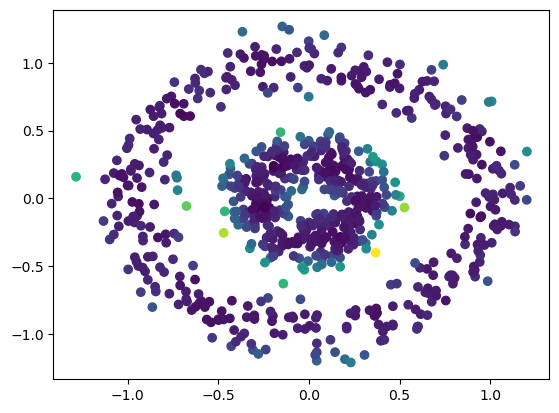

In [20]:
plt.scatter(x[:,0],x[:,1],c=lof_scores)

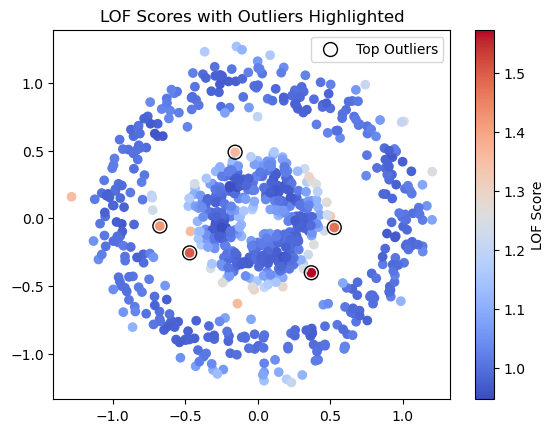

In [21]:
plt.scatter(x[:, 0], x[:, 1], c=lof_scores, cmap='coolwarm')
plt.colorbar(label='LOF Score')
top_outliers_idx = lof_scores.argsort()[-5:]  # Highest LOF = most outlier-like
plt.scatter(x[top_outliers_idx, 0], x[top_outliers_idx, 1], edgecolors='k', facecolors='none', s=100, label='Top Outliers')
plt.legend()
plt.title("LOF Scores with Outliers Highlighted")
plt.show()